In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
from pandas import read_excel
ewa=pd.read_excel("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\\Clustering\\EastWestAirlines.xlsx",sheet_name=1)

In [21]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [28]:
df_norm = norm_func(ewa.iloc[:,1:-1])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


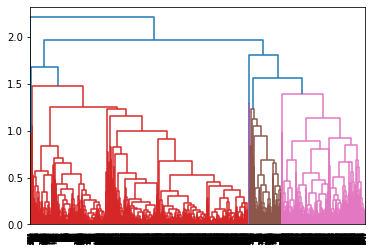

In [33]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

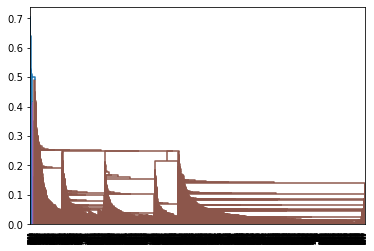

In [34]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

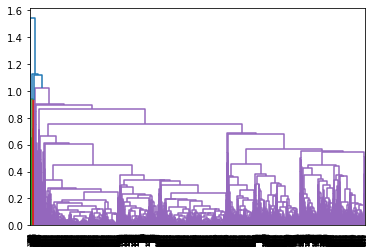

In [35]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

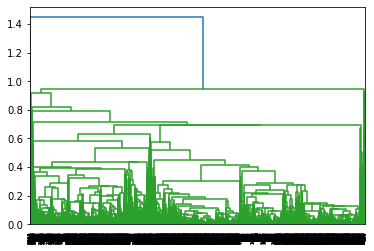

In [37]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [40]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [41]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [42]:
df_norm['h_clusterid'] = pd.DataFrame(y_hc)

In [43]:
ewa['h_clusterid'] = pd.DataFrame(y_hc)

In [47]:
result=ewa.iloc[:,1:].groupby(ewa.h_clusterid).mean()

In [48]:
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,55625.489827,141.643762,1.201152,1.021497,1.001152,5418.927447,7.699424,421.536660,1.272937,4085.983877,0.274088,0
1,141021.000000,0.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857,0.500000,1
2,106776.901163,149.668605,3.667151,1.001453,1.001453,38389.199128,18.653343,477.122093,1.428052,4182.311047,0.549419,2
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3
